#### Data cleaning for ONS E-cigarette use Great Britain (Table 3.1 in the data sources Miro table):
##### Table 1: E-cigarette use as proportion of population 16+, by sex and age, Great Britain, 2014 to 2022
- Table 1a: 2020 to 2022

- Table 1b: 2018 to 2019

- Table 1c: 2014 to 2017

We need to merge the three tables to have the data on e-cig use from 2014-2022 in one set.

**Data caveats:**

- Notes with the data state that changes in survey questions across time affected the continuity of data on ex-vapers. Due to this unreliability of the data, as our project only requires prevalence of current e-cigarette smokers, we will **extract only the data on current users** and ignore the other classifications.

- Notes state that the categories for current users changed between 2019 and 2020:
**the sum of the newer categories of 'daily user' and 'occasional user' equates to the single previous category of 'current user'.** This is acceptable for continuity.

- Table 1b and 1c used the same classification so do not need amending when combining, table 1a however will need the current and occasional users rows summed for each of the three years it covers. 



In [1]:
import pandas as pd

#Table 1a
table1a = pd.read_csv(r"C:\Users\Bonald\Desktop\Group project\ONS e-cig use in GB\Table_1a-Table 1.csv", header=1)

table1a.head(15)

,Year,Proportion of population aged 16 years and over by e-cigarette use [note 1],Men \naged \n16 to 24,Men \naged \n25 to 34,Men \naged \n35 to 49,Men \naged \n50 to 59,Men \naged \n60 and over,Men \naged \n16 and over,Women \naged \n16 to 24,Women \naged \n25 to 34,Women \naged \n35 to 49,Women \naged \n50 to 59,Women \naged \n60 and over,Women \naged \n16 and over,All persons \naged \n16 to 24,All persons \naged \n25 to 34,All persons \naged \n35 to 49,All persons \naged \n50 to 59,All persons \naged \n60 and over,All persons \naged \n16 and over
0,2022,Daily user (%),3.6,7.4,8.2,7.4,3.7,6.0,6.7,6.2,4.9,4.9,2.2,4.4,5.1,6.8,6.5,6.1,2.9,5.2
1,2022,Occasional user (%),8.7,4.2,3.5,2.5,1.4,3.5,12.2,3.5,2.6,2.3,1.5,3.5,10.4,3.8,3.0,2.4,1.5,3.5
2,2022,Used one previously (%),7,10.2,11.2,8.4,3.9,7.8,5.6,6.3,4.7,6.0,2.3,4.5,6.3,8.3,7.9,7.2,3.0,6.1
3,2022,Never used (%),80.6,78.2,77.0,81.8,91.0,82.7,75.5,84.0,87.8,86.8,94.0,87.5,78.1,81.1,82.5,84.3,92.6,85.2
4,2022,Weighted base (in thousands),3494,"4,269","5,950","4,201","7,741","25,655","3,362","4,185","6,146","4,207","8,795","26,695","6,856","8,453","12,097","8,407","16,536","52,350"
5,2022,Unweighted sample,504,667,1253,1225,5271,8920,655,1025,1647,1443,6042,"10,812",1159,1692,2900,2668,11313,"19,732"
6,2021,Daily user (%),5.1,11.3,7.7,5.3,4.2,6.4,1.9,5.4,3.8,5.8,1.8,3.5,3.6,8.3,5.7,5.6,2.9,4.9
7,2021,Occasional user (%),7.9,2.0,4.3,2.6,1.6,3.3,7.1,3.0,1.9,1.4,0.6,2.2,7.5,2.5,3.1,2.0,1.1,2.8
8,2021,Used one previously (%),8.0,6.0,8.1,8.6,4.9,6.8,4.2,13.7,7.3,3.5,2.5,5.7,6.2,9.9,7.7,6.0,3.6,6.3
9,2021,Never used (%),79.0,80.7,80.0,83.5,89.4,83.4,86.7,77.9,86.9,89.3,95.1,88.5,82.7,79.3,83.5,86.5,92.4,86.0


In [2]:
#We can see 2022 daily and occasional users are at index 0 and 1, 2021 are at index 6 and 7, and 2020 are at index 12 and 13.
#Extract and concatenate these

table1a = pd.concat([table1a.loc[0:1], table1a.loc[6:7], table1a.loc[12:13]])

table1a

#reset the index
table1a.reset_index(drop=True)

,Year,Proportion of population aged 16 years and over by e-cigarette use [note 1],Men \naged \n16 to 24,Men \naged \n25 to 34,Men \naged \n35 to 49,Men \naged \n50 to 59,Men \naged \n60 and over,Men \naged \n16 and over,Women \naged \n16 to 24,Women \naged \n25 to 34,Women \naged \n35 to 49,Women \naged \n50 to 59,Women \naged \n60 and over,Women \naged \n16 and over,All persons \naged \n16 to 24,All persons \naged \n25 to 34,All persons \naged \n35 to 49,All persons \naged \n50 to 59,All persons \naged \n60 and over,All persons \naged \n16 and over
0,2022,Daily user (%),3.6,7.4,8.2,7.4,3.7,6.0,6.7,6.2,4.9,4.9,2.2,4.4,5.1,6.8,6.5,6.1,2.9,5.2
1,2022,Occasional user (%),8.7,4.2,3.5,2.5,1.4,3.5,12.2,3.5,2.6,2.3,1.5,3.5,10.4,3.8,3.0,2.4,1.5,3.5
2,2021,Daily user (%),5.1,11.3,7.7,5.3,4.2,6.4,1.9,5.4,3.8,5.8,1.8,3.5,3.6,8.3,5.7,5.6,2.9,4.9
3,2021,Occasional user (%),7.9,2.0,4.3,2.6,1.6,3.3,7.1,3.0,1.9,1.4,0.6,2.2,7.5,2.5,3.1,2.0,1.1,2.8
4,2020,Daily user (%),4.1,4.6,7.0,6.6,2.1,4.7,1.6,4.4,2.9,4.9,1.9,3.0,2.9,4.5,5.0,5.7,2.0,3.8
5,2020,Occasional user (%),5.0,4.3,2.2,1.5,1.2,2.5,3.1,3.9,2.7,2.8,1.7,2.6,4.1,4.1,2.5,2.2,1.5,2.6


In [4]:
#Combine the rows for daily and occasional user for each year 
 
#First check the datatypes
table1a.dtypes

#The values are numbers, change numeric columns to float values 
numeric_columns = ['Men \naged \n16 to 24',	'Men \naged \n25 to 34', 'Men \naged \n35 to 49', 'Men \naged \n50 to 59', 'Men \naged \n60 and over', 'Men \naged \n16 and over', 'Women \naged \n16 to 24', 'Women \naged \n25 to 34', 'Women \naged \n35 to 49', 'Women \naged \n50 to 59', 'Women \naged \n60 and over', 'Women \naged \n16 and over', 'All persons \naged \n16 to 24',	'All persons \naged \n25 to 34', 'All persons \naged \n35 to 49', 'All persons \naged \n50 to 59', 'All persons \naged \n60 and over', 'All persons \naged \n16 and over']
table1a[numeric_columns] = table1a[numeric_columns].astype(float)

table1a.dtypes

Year                                                                             int64
Proportion of population aged 16 years and over by e-cigarette use [note 1]     object
Men \naged \n16 to 24                                                          float64
Men \naged \n25 to 34                                                          float64
Men \naged \n35 to 49                                                          float64
Men \naged \n50 to 59                                                          float64
Men \naged \n60 and over                                                       float64
Men \naged \n16 and over                                                       float64
Women \naged \n16 to 24                                                        float64
Women \naged \n25 to 34                                                        float64
Women \naged \n35 to 49                                                        float64
Women \naged \n50 to 59                    

In [7]:
#Combine the values in the daily and occasional user columns using the group by, aggregate and sum functions

table1a = table1a.groupby('Year').agg(sum)

table1a

C:\Users\Bonald\AppData\Local\Temp\ipykernel_3712\4006523156.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table1a = table1a.groupby('Year').agg(sum)


,Proportion of population aged 16 years and over by e-cigarette use [note 1],Men \naged \n16 to 24,Men \naged \n25 to 34,Men \naged \n35 to 49,Men \naged \n50 to 59,Men \naged \n60 and over,Men \naged \n16 and over,Women \naged \n16 to 24,Women \naged \n25 to 34,Women \naged \n35 to 49,Women \naged \n50 to 59,Women \naged \n60 and over,Women \naged \n16 and over,All persons \naged \n16 to 24,All persons \naged \n25 to 34,All persons \naged \n35 to 49,All persons \naged \n50 to 59,All persons \naged \n60 and over,All persons \naged \n16 and over
Year,,,,,,,,,,,,,,,,,,,
2020,Daily user (%)Occasional user (%),9.1,8.9,9.2,8.1,3.3,7.2,4.7,8.3,5.6,7.7,3.6,5.6,7.0,8.6,7.5,7.9,3.5,6.4
2021,Daily user (%)Occasional user (%),13.0,13.3,12.0,7.9,5.8,9.7,9.0,8.4,5.7,7.2,2.4,5.7,11.1,10.8,8.8,7.6,4.0,7.7
2022,Daily user (%)Occasional user (%),12.3,11.6,11.7,9.9,5.1,9.5,18.9,9.7,7.5,7.2,3.7,7.9,15.5,10.6,9.5,8.5,4.4,8.7


In [8]:
#This has made the format of the table strange, with a missing index and second header row. Fix by writing to csv then reading in the table again

table1a.to_csv(r'C:\Users\Bonald\Desktop\Group project\Table1a_cleaned.csv')

table1a_new = pd.read_csv(r"C:\Users\Bonald\Desktop\Group project\Table1a_cleaned.csv")

table1a_new

#The data is now in the expected format. Re-sort to descending year order 
table1a_sorted = table1a_new.sort_values(by = 'Year', ascending=False) 

#Reset the index
table1a_sorted.reset_index()


,index,Year,Proportion of population aged 16 years and over by e-cigarette use [note 1],Men \naged \n16 to 24,Men \naged \n25 to 34,Men \naged \n35 to 49,Men \naged \n50 to 59,Men \naged \n60 and over,Men \naged \n16 and over,Women \naged \n16 to 24,...,Women \naged \n35 to 49,Women \naged \n50 to 59,Women \naged \n60 and over,Women \naged \n16 and over,All persons \naged \n16 to 24,All persons \naged \n25 to 34,All persons \naged \n35 to 49,All persons \naged \n50 to 59,All persons \naged \n60 and over,All persons \naged \n16 and over
0,2,2022,Daily user (%)Occasional user (%),12.3,11.6,11.7,9.9,5.1,9.5,18.9,...,7.5,7.2,3.7,7.9,15.5,10.6,9.5,8.5,4.4,8.7
1,1,2021,Daily user (%)Occasional user (%),13.0,13.3,12.0,7.9,5.8,9.7,9.0,...,5.7,7.2,2.4,5.7,11.1,10.8,8.8,7.6,4.0,7.7
2,0,2020,Daily user (%)Occasional user (%),9.1,8.9,9.2,8.1,3.3,7.2,4.7,...,5.6,7.7,3.6,5.6,7.0,8.6,7.5,7.9,3.5,6.4


In [10]:
#Table1b

table1b = pd.read_csv(r"C:\Users\Bonald\Desktop\Group project\ONS e-cig use in GB\Table_1b-Table 1.csv", header=1)

table1b.head(15)

#We can see that 2019 current users is at index 0 and 2018 is at index 7, extract these rows

table1b = table1b[0:7:6]

table1b

,Year,Proportion of population aged 16 years and over by e-cigarette use [note 1],Men \naged \n16 to 24,Men \naged \n25 to 34,Men \naged \n35 to 49,Men \naged \n50 to 59,Men \naged \n60 and over,Men \naged \n16 and over,Women \naged \n16 to 24,Women \naged \n25 to 34,Women \naged \n35 to 49,Women \naged \n50 to 59,Women \naged \n60 and over,Women \naged \n16 and over,All persons \naged \n16 to 24,All persons \naged \n25 to 34,All persons \naged \n35 to 49,All persons \naged \n50 to 59,All persons \naged \n60 and over,All persons \naged \n16 and over
0,2019,"Current e-cigarette user, or vaper (%)",3.2,7.7,9.3,6.6,3.8,6.1,3.4,10.5,5.4,7.5,2.4,5.4,3.3,9.2,7.3,7.1,3.0,5.7
6,2018,"Current e-cigarette user, or vaper (%)",7.8,9.3,11.3,7.2,3.5,7.7,1.1,4.7,5.7,6.3,5.1,5.0,4.8,7.0,8.5,6.8,4.4,6.3


In [11]:
#Table 1c
table1c = pd.read_csv(r"C:\Users\Bonald\Desktop\Group project\ONS e-cig use in GB\Table_1c-Table 1.csv")

table1c.head(15)

#The current user rows start at 0 and end at 18 in increments of 6, extract these rows

table1c = table1c.loc[0:18:6]

table1c

,Year,Proportion of population aged 16 years and over by e-cigarette use [note 1],Men \naged \n16 to 24,Men \naged \n25 to 34,Men \naged \n35 to 49,Men \naged \n50 to 59,Men \naged \n60 and over,Men \naged \n16 and over,Women \naged \n16 to 24,Women \naged \n25 to 34,Women \naged \n35 to 49,Women \naged \n50 to 59,Women \naged \n60 and over,Women \naged \n16 and over,All persons \naged \n16 to 24,All persons \naged \n25 to 34,All persons \naged \n35 to 49,All persons \naged \n50 to 59,All persons \naged \n60 and over,All persons \naged \n16 and over
0,2017,"Current e-cigarette user, or vaper (%)",7.6,9.3,8.5,5.7,2.8,6.5,3.1,5.3,6.3,5.2,3.3,4.6,5.4,7.3,7.4,5.4,3.1,5.5
6,2016,"Current e-cigarette user, or vaper (%)",8.9,8.4,7.4,5.6,3.0,6.3,2.6,5.5,6.7,7.5,2.8,4.9,5.8,6.9,7.1,6.5,2.9,5.6
12,2015,"Current e-cigarette user, or vaper (%)",4.0,5.9,6.1,4.6,2.6,4.6,1.6,5.7,6.8,5.4,2.5,4.4,2.8,5.8,6.5,5.0,2.6,4.5
18,2014,"Current e-cigarette user, or vaper (%)",1.0,5.3,7.0,3.4,2.2,4.0,1.9,5.4,4.3,3.6,2.0,3.4,1.4,5.3,5.6,3.5,2.1,3.7


In [12]:
#Concatenate tables 1a, 1b and 1c vertically to combine them
table1 = pd.concat([table1a_sorted, table1b, table1c], axis=0)

#reset the index
table1.reset_index(drop=True, inplace=True)

#View and check full table
table1

#The tables are now combined and ready for further cleaning 

,Year,Proportion of population aged 16 years and over by e-cigarette use [note 1],Men \naged \n16 to 24,Men \naged \n25 to 34,Men \naged \n35 to 49,Men \naged \n50 to 59,Men \naged \n60 and over,Men \naged \n16 and over,Women \naged \n16 to 24,Women \naged \n25 to 34,Women \naged \n35 to 49,Women \naged \n50 to 59,Women \naged \n60 and over,Women \naged \n16 and over,All persons \naged \n16 to 24,All persons \naged \n25 to 34,All persons \naged \n35 to 49,All persons \naged \n50 to 59,All persons \naged \n60 and over,All persons \naged \n16 and over
0,2022,Daily user (%)Occasional user (%),12.3,11.6,11.7,9.9,5.1,9.5,18.9,9.7,7.5,7.2,3.7,7.9,15.5,10.6,9.5,8.5,4.4,8.7
1,2021,Daily user (%)Occasional user (%),13.0,13.3,12.0,7.9,5.8,9.7,9.0,8.4,5.7,7.2,2.4,5.7,11.1,10.8,8.8,7.6,4.0,7.7
2,2020,Daily user (%)Occasional user (%),9.1,8.9,9.2,8.1,3.3,7.2,4.7,8.3,5.6,7.7,3.6,5.6,7.0,8.6,7.5,7.9,3.5,6.4
3,2019,"Current e-cigarette user, or vaper (%)",3.2,7.7,9.3,6.6,3.8,6.1,3.4,10.5,5.4,7.5,2.4,5.4,3.3,9.2,7.3,7.1,3.0,5.7
4,2018,"Current e-cigarette user, or vaper (%)",7.8,9.3,11.3,7.2,3.5,7.7,1.1,4.7,5.7,6.3,5.1,5.0,4.8,7.0,8.5,6.8,4.4,6.3
5,2017,"Current e-cigarette user, or vaper (%)",7.6,9.3,8.5,5.7,2.8,6.5,3.1,5.3,6.3,5.2,3.3,4.6,5.4,7.3,7.4,5.4,3.1,5.5
6,2016,"Current e-cigarette user, or vaper (%)",8.9,8.4,7.4,5.6,3.0,6.3,2.6,5.5,6.7,7.5,2.8,4.9,5.8,6.9,7.1,6.5,2.9,5.6
7,2015,"Current e-cigarette user, or vaper (%)",4.0,5.9,6.1,4.6,2.6,4.6,1.6,5.7,6.8,5.4,2.5,4.4,2.8,5.8,6.5,5.0,2.6,4.5
8,2014,"Current e-cigarette user, or vaper (%)",1.0,5.3,7.0,3.4,2.2,4.0,1.9,5.4,4.3,3.6,2.0,3.4,1.4,5.3,5.6,3.5,2.1,3.7


In [13]:
#Explore the data

#View table size
table1.shape

#View information on all columns in the dataframe
table1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2020 to 2022
Data columns (total 19 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Proportion of population aged 16 years and over by e-cigarette use [note 1]  3 non-null      object 
 1   Men 
aged 
16 to 24                                                          3 non-null      float64
 2   Men 
aged 
25 to 34                                                          3 non-null      float64
 3   Men 
aged 
35 to 49                                                          3 non-null      float64
 4   Men 
aged 
50 to 59                                                          3 non-null      float64
 5   Men 
aged 
60 and over                                                       3 non-null      float64
 6   Men 
aged 
16 and over                       

In [16]:
#Remove the current user column 

table1.drop(['Proportion of population aged 16 years and over by e-cigarette use [note 1]'], axis=1, inplace=True)

table1.head()

,Year,Men \naged \n16 to 24,Men \naged \n25 to 34,Men \naged \n35 to 49,Men \naged \n50 to 59,Men \naged \n60 and over,Men \naged \n16 and over,Women \naged \n16 to 24,Women \naged \n25 to 34,Women \naged \n35 to 49,Women \naged \n50 to 59,Women \naged \n60 and over,Women \naged \n16 and over,All persons \naged \n16 to 24,All persons \naged \n25 to 34,All persons \naged \n35 to 49,All persons \naged \n50 to 59,All persons \naged \n60 and over,All persons \naged \n16 and over
0,2022,12.3,11.6,11.7,9.9,5.1,9.5,18.9,9.7,7.5,7.2,3.7,7.9,15.5,10.6,9.5,8.5,4.4,8.7
1,2021,13.0,13.3,12.0,7.9,5.8,9.7,9.0,8.4,5.7,7.2,2.4,5.7,11.1,10.8,8.8,7.6,4.0,7.7
2,2020,9.1,8.9,9.2,8.1,3.3,7.2,4.7,8.3,5.6,7.7,3.6,5.6,7.0,8.6,7.5,7.9,3.5,6.4
3,2019,3.2,7.7,9.3,6.6,3.8,6.1,3.4,10.5,5.4,7.5,2.4,5.4,3.3,9.2,7.3,7.1,3.0,5.7
4,2018,7.8,9.3,11.3,7.2,3.5,7.7,1.1,4.7,5.7,6.3,5.1,5.0,4.8,7.0,8.5,6.8,4.4,6.3


In [17]:
#View and rename table columns to be more concise

table1.columns

table1.columns = ["Year", "Men 16-24", "Men 25-34", "Men 35-49", "Men 50-59", "Men 60+", "All men 16+",
                  "Women 16-14", "Women 25-34", "Women 35-49", "Women 50-59", "Women 60+", "All women 16+",
                  "All 16-24", "All 25-34", "All 35-49", "All 50-59", "All 60+", "All 16+"]
table1.head()

,Year,Men 16-24,Men 25-34,Men 35-49,Men 50-59,Men 60+,All men 16+,Women 16-14,Women 25-34,Women 35-49,Women 50-59,Women 60+,All women 16+,All 16-24,All 25-34,All 35-49,All 50-59,All 60+,All 16+
0,2022,12.3,11.6,11.7,9.9,5.1,9.5,18.9,9.7,7.5,7.2,3.7,7.9,15.5,10.6,9.5,8.5,4.4,8.7
1,2021,13.0,13.3,12.0,7.9,5.8,9.7,9.0,8.4,5.7,7.2,2.4,5.7,11.1,10.8,8.8,7.6,4.0,7.7
2,2020,9.1,8.9,9.2,8.1,3.3,7.2,4.7,8.3,5.6,7.7,3.6,5.6,7.0,8.6,7.5,7.9,3.5,6.4
3,2019,3.2,7.7,9.3,6.6,3.8,6.1,3.4,10.5,5.4,7.5,2.4,5.4,3.3,9.2,7.3,7.1,3.0,5.7
4,2018,7.8,9.3,11.3,7.2,3.5,7.7,1.1,4.7,5.7,6.3,5.1,5.0,4.8,7.0,8.5,6.8,4.4,6.3


In [18]:
#Check for missing values and duplicates
missing = table1a.isnull().sum()
print(missing)

duplicates = table1a.duplicated().sum()
print(duplicates)


Proportion of population aged 16 years and over by e-cigarette use [note 1]    0
Men \naged \n16 to 24                                                          0
Men \naged \n25 to 34                                                          0
Men \naged \n35 to 49                                                          0
Men \naged \n50 to 59                                                          0
Men \naged \n60 and over                                                       0
Men \naged \n16 and over                                                       0
Women \naged \n16 to 24                                                        0
Women \naged \n25 to 34                                                        0
Women \naged \n35 to 49                                                        0
Women \naged \n50 to 59                                                        0
Women \naged \n60 and over                                                     0
Women \naged \n16 and over  

In [19]:
#Normalise data types 

#Check data types 
table1.dtypes

# All the columns showing proportion are object data type, we need to change these to float
# Extract the float columns and apply type change 
float_columns = table1.select_dtypes(include='object').columns
table1[float_columns] = table1[float_columns].astype("float")

# Check
table1.dtypes


Year               int64
Men 16-24        float64
Men 25-34        float64
Men 35-49        float64
Men 50-59        float64
Men 60+          float64
All men 16+      float64
Women 16-14      float64
Women 25-34      float64
Women 35-49      float64
Women 50-59      float64
Women 60+        float64
All women 16+    float64
All 16-24        float64
All 25-34        float64
All 35-49        float64
All 50-59        float64
All 60+          float64
All 16+          float64
dtype: object

In [20]:
#Explore the proportional numeric data

table1.describe()

#.describe() for the whole table is overwhelming - view summary statistics just for total men, total women, and all people (over 16)
table1[["All men 16+", "All women 16+", "All 16+"]].describe()

#The data is skewing high, with the range between the second and third quartile considerably higher than the range between the 1st and 2nd quartile,
#with the mean sitting low within the spread. This means there could be outliers in the data skewing it high, or this could be due to our
#data post 2019 combining 'daily' and 'occasional' users, making the figures disproportionately higher. We will explore this in test visualisations

,All men 16+,All women 16+,All 16+
count,9.000000,9.000000,9.000000
mean,6.844444,5.211111,6.011111
std,1.941720,1.230289,1.519411
min,4.000000,3.400000,3.700000
25%,6.100000,4.600000,5.500000
50%,6.500000,5.000000,5.700000
75%,7.700000,5.600000,6.400000
max,9.700000,7.900000,8.700000


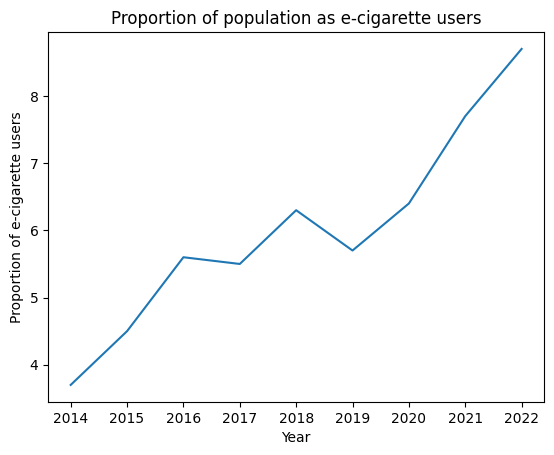

In [21]:
#Test visualisations to view the data to assess its quality

import matplotlib.pyplot as plt

#Total e-cig users over time
year = table1['Year']
total_proportion = table1['All 16+']

plt.plot(year, total_proportion)

plt.xlabel("Year")
plt.ylabel("Proportion of e-cigarette users")
plt.title("Proportion of population as e-cigarette users")

plt.show()

Although the data as a whole shows a clear positive trend, the numbers increase more steeply after 2020. 
We must consider that the steepness of this curve could be **due to the survey questions changing**, where we have combined 'daily user' and 'occasional user'
to equate to the previous category of 'current user'. Although the data notes state that this contunity has minimal impact, 
when answering the survey those who are only occasional users may not have classified themselves previously as a 'current user',
**leading the proportion figures to skew disproportionately higher from 2020 onwards** (but not too drastically). 

In [22]:
#Let's look at the data when a function is applied to remove outliers using IQR - Funmi's code:

def remove_outliers_iqr(table1):
    # Select numeric columns
    numeric_cols = table1.select_dtypes('float').columns

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = table1[numeric_cols].quantile(0.25)
    Q3 = table1[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as those lying outside 1.5 * IQR from Q1 and Q3
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    outliers_removed = table1[~((table1[numeric_cols] < lower_bound) | (table1[numeric_cols] > upper_bound)).any(axis=1)]
    return outliers_removed

# Apply to remove outliers
table1_cleaned = remove_outliers_iqr(table1)

print("Dataset after removing outliers:")
table1_cleaned

Dataset after removing outliers:


,Year,Men 16-24,Men 25-34,Men 35-49,Men 50-59,Men 60+,All men 16+,Women 16-14,Women 25-34,Women 35-49,Women 50-59,Women 60+,All women 16+,All 16-24,All 25-34,All 35-49,All 50-59,All 60+,All 16+
2,2020,9.1,8.9,9.2,8.1,3.3,7.2,4.7,8.3,5.6,7.7,3.6,5.6,7.0,8.6,7.5,7.9,3.5,6.4
3,2019,3.2,7.7,9.3,6.6,3.8,6.1,3.4,10.5,5.4,7.5,2.4,5.4,3.3,9.2,7.3,7.1,3.0,5.7
4,2018,7.8,9.3,11.3,7.2,3.5,7.7,1.1,4.7,5.7,6.3,5.1,5.0,4.8,7.0,8.5,6.8,4.4,6.3
5,2017,7.6,9.3,8.5,5.7,2.8,6.5,3.1,5.3,6.3,5.2,3.3,4.6,5.4,7.3,7.4,5.4,3.1,5.5
6,2016,8.9,8.4,7.4,5.6,3.0,6.3,2.6,5.5,6.7,7.5,2.8,4.9,5.8,6.9,7.1,6.5,2.9,5.6
7,2015,4.0,5.9,6.1,4.6,2.6,4.6,1.6,5.7,6.8,5.4,2.5,4.4,2.8,5.8,6.5,5.0,2.6,4.5


This removes the data for 2014 and for 2020 onwards, where the correlation curve is steepest, mathematically confirming what we could view in the visualisation. 

Let's try merging and visualising the data using only the 'daily user' data from 2020 onwards in table 1a, not aggregating with 'occasional user', to see if this results in more consistent data.

In [33]:
#We will re-run the previous cleaning code (in quick time), with the difference that only the 'daily user' columns are extracted for table1a

t1a = pd.read_csv(r"C:\Users\Bonald\Desktop\Group project\ONS e-cig use in GB\Table_1a-Table 1.csv", header=1)

t1a.head(15)

t1a = pd.concat([t1a.loc[0:12:6]])

t1a

t1 = pd.concat([t1a, table1b, table1c], axis=0)

t1.reset_index(drop=True, inplace=True)

t1.drop(['Proportion of population aged 16 years and over by e-cigarette use [note 1]'], axis=1, inplace=True)

float_columns = t1.select_dtypes(include='object').columns
t1[float_columns] = t1[float_columns].astype("float")

t1.dtypes

t1.columns = ["Year", "Men 16-24", "Men 25-34", "Men 35-49", "Men 50-59", "Men 60+", "All men 16+",
                  "Women 16-14", "Women 25-34", "Women 35-49", "Women 50-59", "Women 60+", "All women 16+",
                  "All 16-24", "All 25-34", "All 35-49", "All 50-59", "All 60+", "All 16+"]

table1_alternate = t1

table1_alternate


,Year,Men 16-24,Men 25-34,Men 35-49,Men 50-59,Men 60+,All men 16+,Women 16-14,Women 25-34,Women 35-49,Women 50-59,Women 60+,All women 16+,All 16-24,All 25-34,All 35-49,All 50-59,All 60+,All 16+
0,2022,3.6,7.4,8.2,7.4,3.7,6.0,6.7,6.2,4.9,4.9,2.2,4.4,5.1,6.8,6.5,6.1,2.9,5.2
1,2021,5.1,11.3,7.7,5.3,4.2,6.4,1.9,5.4,3.8,5.8,1.8,3.5,3.6,8.3,5.7,5.6,2.9,4.9
2,2020,4.1,4.6,7.0,6.6,2.1,4.7,1.6,4.4,2.9,4.9,1.9,3.0,2.9,4.5,5.0,5.7,2.0,3.8
3,2019,3.2,7.7,9.3,6.6,3.8,6.1,3.4,10.5,5.4,7.5,2.4,5.4,3.3,9.2,7.3,7.1,3.0,5.7
4,2018,7.8,9.3,11.3,7.2,3.5,7.7,1.1,4.7,5.7,6.3,5.1,5.0,4.8,7.0,8.5,6.8,4.4,6.3
5,2017,7.6,9.3,8.5,5.7,2.8,6.5,3.1,5.3,6.3,5.2,3.3,4.6,5.4,7.3,7.4,5.4,3.1,5.5
6,2016,8.9,8.4,7.4,5.6,3.0,6.3,2.6,5.5,6.7,7.5,2.8,4.9,5.8,6.9,7.1,6.5,2.9,5.6
7,2015,4.0,5.9,6.1,4.6,2.6,4.6,1.6,5.7,6.8,5.4,2.5,4.4,2.8,5.8,6.5,5.0,2.6,4.5
8,2014,1.0,5.3,7.0,3.4,2.2,4.0,1.9,5.4,4.3,3.6,2.0,3.4,1.4,5.3,5.6,3.5,2.1,3.7


In [34]:
table1_alternate[["All men 16+", "All women 16+", "All 16+"]].describe()

#This data has a very skewed spread that looks to be very irregular 

,All men 16+,All women 16+,All 16+
count,9.000000,9.000000,9.000000
mean,5.811111,4.288889,5.022222
std,1.158064,0.814623,0.881445
min,4.000000,3.000000,3.700000
25%,4.700000,3.500000,4.500000
50%,6.100000,4.400000,5.200000
75%,6.400000,4.900000,5.600000
max,7.700000,5.400000,6.300000


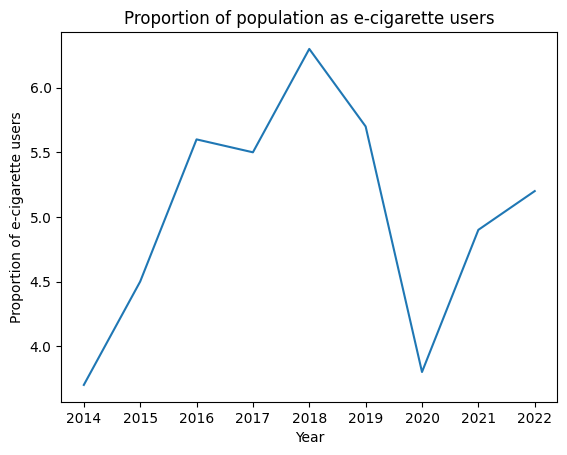

In [31]:
#Let's view this in a visualisation

import matplotlib.pyplot as plt

#Total e-cig users over time
year = t1['Year']
total_proportion = t1['All 16+']

plt.plot(year, total_proportion)

plt.xlabel("Year")
plt.ylabel("Proportion of e-cigarette users")
plt.title("Proportion of population as e-cigarette users")

plt.show()

This data clearly looks very inaccurate and should not be used!

We will use our original data, with the awareness that the survey questions changed, where those who previously didn't identify themselves as 'current users' may have in the more recent survey identified themselves as 'occasional users', **having a small impact on the data continuity with slightly higher figures from 2020 onwards**.

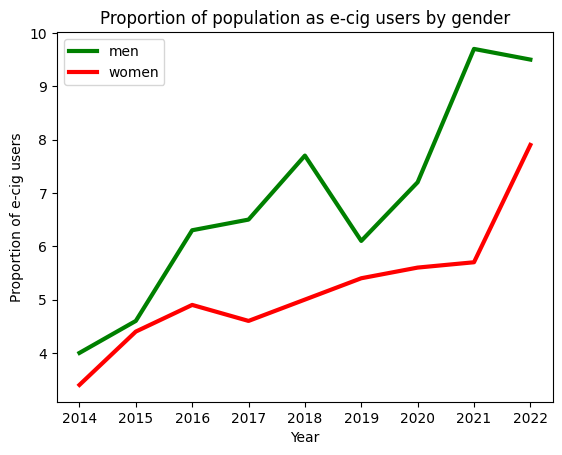

In [36]:
#Some more test visualisations (with the original data)

#E-cig users by gender over time

men = table1['All men 16+']
women = table1['All women 16+']

plt.plot(year, men, 'g', label='men', linewidth=3)
plt.plot(year, women, 'r', label='women', linewidth=3)

plt.xlabel("Year")
plt.ylabel("Proportion of e-cig users")
plt.title("Proportion of population as e-cig users by gender")

plt.legend()
plt.show()

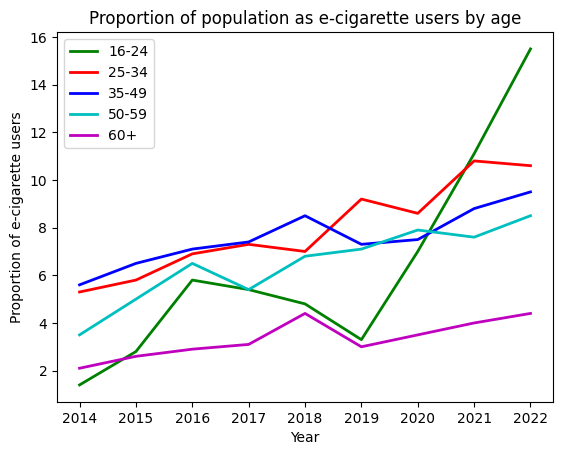

In [37]:
#E-cig users by age over time

age1 = table1['All 16-24']
age2 = table1['All 25-34']
age3 = table1['All 35-49']
age4 = table1['All 50-59']
age5 = table1['All 60+']

plt.plot(year, age1, 'g', label='16-24', linewidth=2)
plt.plot(year, age2, 'r', label='25-34', linewidth=2)
plt.plot(year, age3, 'b', label='35-49', linewidth=2)
plt.plot(year, age4, 'c', label='50-59', linewidth=2)
plt.plot(year, age5, 'm', label='60+', linewidth=2)

plt.xlabel("Year")
plt.ylabel("Proportion of e-cigarette users")
plt.title("Proportion of population as e-cigarette users by age")

plt.legend()
plt.show()

We can see here that **the skew from 2020 onwards is due to data in the youngest age category**, with a very steep rise from 2020 onwards where the change in survey questions look likely to have had an affect on continuity. 

In [39]:
#Write the cleaned data to a new csv 
table1.to_csv('Table1abc_cleaned.csv', encoding='utf-8')